C:\Users\kajua\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
C:\Users\kajua\anaconda3\lib\site-packages\ipykernel_launcher.py:309: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


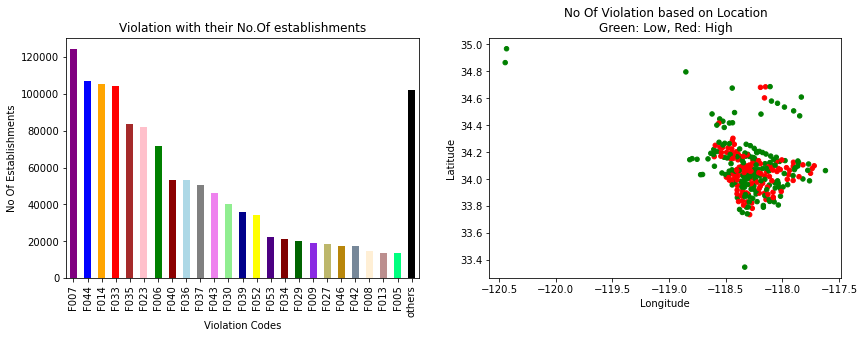

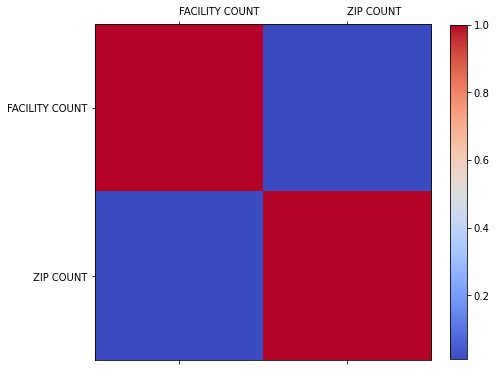

In [9]:
from tkinter import *
from tkinter import ttk
import tkinter as tk
from tkinter import scrolledtext
import tkinter.font as font
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg



class myapi():
    
   
    def __init__(self):
        #private variable
        self.__data= 'Inspections.csv'
        self.__vio= 'violations.csv'
        
    def load_GUI(self):
        #confirmed tv1 and merged is global variable
        global tv1
        global merged
        try:
            #function to change the str to datetime object
            d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
            #importing csv file in dataframe structure
            inspection = pd.read_csv(self.__data, parse_dates=['ACTIVITY DATE'], date_parser=d_parser)
            #importing csv file in dataframe structure
            violation = pd.read_csv(self.__vio)
            #consolidating serial no with their respective count of points
            violation_SN = violation.groupby('SERIAL NUMBER', as_index= False)['POINTS'].count()
            #changing the name of the columns
            violation_SN.columns = ['SERIAL NUMBER', 'No Of Violations']
            #merging the inspection and violation dataframe
            merged= pd.merge(inspection,violation_SN, on= 'SERIAL NUMBER', how= 'left')
        except FileNotFoundError:
            #deny the action
            tk.messagebox.showinfo('Message','Inspection.csv and violation.csv file is not found')
        except:
            #deny the action
            tk.messagebox.showinfo('Message','Action denied because of error')
        
        #empty the treeview 1
        tv1.delete(*tv1.get_children())
        tv1["column"] = list(merged.columns)
        # equate the columns of tv1(treeview 1) to the selected dataframe
        tv1["show"] = "headings"
        #equate the heading to treeview show
        for column in tv1["columns"]:
            tv1.heading(column, text=column) # let the column heading = column name
        merged_rows =merged.to_numpy().tolist() # turns the dataframe into a list of lists
        for row in merged_rows:
            tv1.insert("", "end", values=row) # inserts each list into the treeview
        #confirming the actions
        tk.messagebox.showinfo('Message','Loaded Dataset')
        return None

    def clean_GUI(self):
        #confirmed tv1, merged and cleaned is a global variable
        global tv1
        global merged
        global cleaned
        
        try:
            #cleaning the loaded dataset
            cleaned= self.clean(merged)
            #deleted index attribute in cleaned dataset
            del cleaned['index']
            
            #empty the treeview 1
            tv1.delete(*tv1.get_children())
            # equate the columns of tv1(treeview 1) to the selected dataframe
            tv1["column"] = list(cleaned.columns)
            #equate the heading to treeview show
            tv1["show"] = "headings"
            for column in tv1["columns"]:
                tv1.heading(column, text=column) # let the column heading = column name

            cleaned_rows = cleaned.to_numpy().tolist() # turns the dataframe into a list of lists
            for row in cleaned_rows:
                tv1.insert("", "end", values=row) # inserts each list into the treeview
            #confirming the actions
            tk.messagebox.showinfo('Message','Cleaned Dataset')
            return None
        except NameError:
            #deny the action
            tk.messagebox.showinfo('Message','Load the dataset before cleaning the Data')
        except:
            #deny the action
            tk.messagebox.showinfo('Message','Action Denied')
        
        
            
    def Save_GUI(self):
        #confirmed cleaned variable is a global
        global cleaned
        try:
            #storing the data in JSON format
            cleaned.to_json('stored.json',orient='records')
            #confirm the action
            tk.messagebox.showinfo('Message','Saved Dataset in JSON format\nfile name is stored.json')
        except NameError:
            #deny the action
            tk.messagebox.showinfo('Message','clean the dataset before saving the Data')
        except:
            #deny the action
            tk.messagebox.showinfo('Message','Action Denied')
            
    def delete_GUI(self):
        #confiemed Treeview 1 as a global variable
        global tv1
        #empty the treeview 1
        tv1.delete(*tv1.get_children())
        return None
                
    def clean(self,df):
        #calling respective function to clean the dataframe
        df= self.remove_inactive(df)
        df= self.drop_duplicates(df)
        df= self.replacing_to_null(df)
        df= self.regex(df)
        df= self.drop_missing(df)
        df= df.reset_index()
        return df
        
    def remove_inactive(self,df):
        #dropping the inactive status of the dataframe
        df= df[df['PROGRAM STATUS']!= 'INACTIVE']
        return df
        
    def drop_duplicates(self,df):
        #dropping duplicates
        df= df.drop_duplicates()
        return df
        
    def drop_missing(self,df):
        #dropping missng values of selected columns
        df= df.dropna(how='any', subset= ['Zip Codes','Latitude','Longitude','seats','SERIAL NUMBER','FACILITY ID'])
        return df
    
    def regex(self,df):
        #creating seats attribute by using find_sixe()
        df['seats'] = df['PE DESCRIPTION'].apply(self.find_size)
        #replacing single empty space to comma in location attributes
        df['Location'] = df['Location'].str.replace(r' ', ',')
        #creating Lattitude attribute by using lat()
        df['Latitude'] = df['Location'].apply(self.lat)
        #creating Longitude attribute by using lon()
        df['Longitude'] = df['Location'].apply(self.lon)
        return df
    
    def find_size(self,str):
        try: 
            #compiled regular expressions
            size= re.compile(r'(?<=\().+(?=\))')
            #searching the data which matches to size
            return size.search(str).group(0)
            
        except AttributeError:
            #return null value
            return np.NAN
    
    def lat(self,location):
        #compiled regular expressions
        lat_lon_match= re.compile(r'\((.*),\s*(.*)\)')
        try:
            #searching the data which matches to lat_lon_match
            lat_lon_pattern= lat_lon_match.search(str(location))
            #taking the second element of the group
            lat= float(lat_lon_pattern.group(2))
            return lat
        except AttributeError:
            #return null value
            return np.NAN
        
    def lon(self,location):
        #compiled regular expressions
        lat_lon_match= re.compile(r'\((.*),\s*(.*)\)')
        try:
            #searching the data which matches to lat_lon_match
            lat_lon_pattern= lat_lon_match.search(str(location))
            #taking the first element of the group
            lon= float(lat_lon_pattern.group(1))
            return lon
        except AttributeError:
            #return null value
            return np.NAN
    def replacing_to_null(self,df):
        #replace 0,'none',''.'0' to np.nan
        df=df.replace(0,np.nan)
        df=df.replace("none", np.nan)
        df=df.replace('',np.nan)
        df=df.replace("0",np.nan)
        return df
        
        

    
    def statistics(self,year=0, var=0): 
        #confirmed tv2 and cleaned as a global variable
        global tv2
        global cleaned
        try:
            # if the year= 1 then the data will filter according to the year of the activity date 2016   
            if year == 1:
                statistics_2016= cleaned.loc[(cleaned['ACTIVITY DATE'] >= pd.to_datetime('2016-01-01')) & (cleaned['ACTIVITY DATE'] < pd.to_datetime('2017-01-01'))]
                #call the statistics_type
                self.statistics_type(statistics_2016,var)
            # if the year= 2 then the data will filter according to the year of the activity date 2017
            elif year == 2:
                statistics_2017= cleaned.loc[(cleaned['ACTIVITY DATE'] >= pd.to_datetime('2017-01-01')) & 
                                        (cleaned['ACTIVITY DATE'] < pd.to_datetime('2018-01-01'))]
                #call the statistics_type
                self.statistics_type(statistics_2017,var)
            # if the year= 3 then the data will filter according to the year of the activity date 2018
            elif year == 3:
                statistics_2018= cleaned.loc[(cleaned['ACTIVITY DATE'] >= pd.to_datetime('2018-01-01')) & 
                                        (cleaned['ACTIVITY DATE'] < pd.to_datetime('2019-01-01'))]
                #call the statistics_type
                self.statistics_type(statistics_2018,var)
                # if the year= 4 then the data will filter according to the year of the activity date 2018
            elif year == 4:
                statistics_2019= cleaned.loc[(cleaned['ACTIVITY DATE'] >= pd.to_datetime('2019-01-01')) & 
                                        (cleaned['ACTIVITY DATE'] < pd.to_datetime('2020-01-01'))]
                #call the statistics_type
                self.statistics_type(statistics_2019, var)
            # if the year= 0 then ask the user to select the year
            elif year == 0:
                tk.messagebox.showinfo('Message','Select the Year')
            
        except:
            # deny the action
            tk.messagebox.showinfo('Message','Action Denied')
        
    def statistics_type(self,df,var):
        # mode function is created to calculate the mode
        def mode(x):
            return x.value_counts().index[0]
        # if the var= 1 then seats attribute is taken as index
        if var == 1:
            try:
                #applying mean, median and mode on selected values
                statistics_df= df.groupby('seats', as_index= False)['SCORE'].agg(['mean','median', mode]).reset_index()
                #confirm the action
                tk.messagebox.showinfo('Message','Action accepted')
            except:
                #deny the action
                tk.messagebox.showinfo('Message','Action denied')
        # if the var= 2 then zip codes attribute is taken as index
        elif var == 2:
            try:
                #applying mean, median and mode on selected values
                statistics_df= df.groupby('Zip Codes', as_index= False)['SCORE'].agg(['mean','median', mode]).reset_index()
                #confirm the action
                tk.messagebox.showinfo('Message','Action accepted')
            except:
                #deny the action
                tk.messagebox.showinfo('Message','Action denied')
        # if the var= 0 then ask the user to select the parameter
        elif var == 0:
            tk.messagebox.showinfo('Message','Select the Parameter')
            
        # empty the treeview 2(tv2)
        tv2.delete(*tv2.get_children())
        # equate the columns of tv2(treeview 2) to the selected dataframe
        tv2["column"] = list(statistics_df.columns)
        tv2["show"] = "headings"
        # let the column heading = column name
        for column in tv2["columns"]:
            tv2.heading(column, text=column)
        # turns the dataframe into a list of lists
        inspection_rows =statistics_df.to_numpy().tolist() 
        # inserts each list into the treeview
        for row in inspection_rows:
            tv2.insert("", "end", values=row)
        return None
    
    def visualising_data(self):
        # visualization loaded
        violation = pd.read_csv(self.__vio)
        # added points per each violation code
        group= violation.groupby('VIOLATION CODE')['POINTS'].sum()
        # added all points of violation code which is less than the average and created the data as series
        other_violation= pd.Series([np.sum(group[group < (np.mean(group))])], index= ['others'])
        # consoliadted all violation code which is more than the average
        group_consolidated= group[group> np.mean(group)].sort_values(ascending= False)
        # concatenated group_consolidated and other_violation
        data= pd.concat([group_consolidated,other_violation])
        #return the data
        return data
    
    def map_data(self):
        #confirmed cleaned is a global variable
        global cleaned
        try:
            #select the specific attributes from the Cleaned dataframe
            merged_sel= cleaned[['Zip Codes','Latitude', 'Longitude','No Of Violations']]
        except NameError:
            #deny the action
            tk.messagebox.showinfo('Message','Cleaned Dataset is not available\nLoad and clean the dataset before doing this operation')
            
        #consolidate the zip code with respective sum of violation
        merged_V= merged_sel.groupby('Zip Codes', as_index= False)['No Of Violations'].sum()
        #consolidate the zip code with respective mean value of Longitude and Lattitude
        merged_L= merged_sel.groupby('Zip Codes', as_index= False)['Latitude', 'Longitude'].mean()
        #merge the merged_V and merged_L
        mapping = pd.merge(merged_V,merged_L, on= 'Zip Codes')
        #mean value of No Of Violations
        mean= np.mean(mapping['No Of Violations'])
        #max value of No Of Violations
        maximum= np.max(mapping['No Of Violations'])
        #discritize the 'No Of Violations' attribute
        mapping['No Of Violations']= pd.cut(mapping['No Of Violations'], bins= [0, mean, maximum], 
                                    labels= [0,1])
        #return the maping
        return mapping
    
    def graph(self):
        #created figures
        fig= plt.figure()
        #created subplot 
        ax1= fig.add_subplot(2,2,1)
        ax2= fig.add_subplot(2,2,2)
        
        #equating data to the return value of visualising_data
        data= self.visualising_data()
        #created bar chart by using panda library
        bar_graph= data.plot.bar(ax= ax1,ylabel= 'No Of Establishments', xlabel= 'Violation Codes', title= 'Violation with their No.Of establishments', 
            color= ['purple','blue','orange','red','brown','pink','green','darkred','lightblue','grey','violet',
                    'lightgreen', 'darkblue','yellow','indigo','maroon','darkgreen','BlueViolet','darkkhaki', 'DarkGoldenrod',
                    'LightSlateGrey','PapayaWhip','RosyBrown','SpringGreen','black'])
        #equating mapping to the return value of map_data
        mapping= self.map_data()
        #creating an colour array
        colors= np.array(['green','red'])
        #changing the no of violation attribute in an array format
        numbers= np.array(mapping['No Of Violations'])
        #creating a scatter plot by using matplotlib library
        map= ax2.scatter(mapping['Longitude'], mapping['Latitude'], s= 20, 
            c= colors[numbers])
        #title of the ax2 
        ax2.set_title('No Of Violation based on Location\nGreen: Low, Red: High')
        #x label of the ax2
        ax2.set_xlabel('Longitude')
        #y label of the ax2
        ax2.set_ylabel('Latitude')
        #size of the fig
        fig.set_size_inches(20, 10, forward=True)
        #return the fig
        return fig
    
    def correlation(self):
        #cleaned is a global variable
        global cleaned
        try:
            #consolidate the FACILITY ID with respective count of violation
            Facility = cleaned.groupby('FACILITY ID', as_index= False)['No Of Violations'].count()
            #rename the columns
            Facility.columns= ['FACILITY ID','FACILITY COUNT']
            #consolidate the Zip Codes with respective count of violation
            zipcodes = cleaned.groupby('Zip Codes', as_index= False)['No Of Violations'].count()
            #rename the columns
            zipcodes.columns= ['Zip Codes','ZIP COUNT']
        except NameError:
            #deny the actions
            tk.messagebox.showinfo('Message','Cleaned Dataset is not available\nLoad and clean the dataset before doing this operation')
            
        #drop the duplicates from the selected attributes
        selected= cleaned[['FACILITY ID','Zip Codes']].drop_duplicates()
        #merge the Facility and selected
        selected= pd.merge(Facility, selected, on= 'FACILITY ID', how= 'left')
        #merge the selected and zipcodes
        selected= pd.merge(selected, zipcodes, on= 'Zip Codes', how= 'left')
        #extract the specific attributes from the selected
        selected= selected[['FACILITY COUNT','ZIP COUNT']]
        #correlate the 'selected'
        corr_matrix= selected.corr(method= 'pearson')
        #equate the columns to the column of selected
        columns = selected.columns
    
        #create a subplot
        fig1, ax = plt.subplots(figsize=(7, 7))
        #create a correlation a heatmap
        mat = ax.matshow(corr_matrix, cmap='coolwarm')
        #set xticks, yticks and their respective labels
        ax.set_xticks(range(len(columns)))
        ax.set_yticks(range(len(columns)))
        ax.set_xticklabels(columns)
        ax.set_yticklabels(columns)
        #configure the correlation heatmap
        plt.setp(ax.get_xticklabels(), ha='left', rotation_mode='anchor')
        plt.colorbar(mat, fraction=0.045, pad=0.05)
        #arrange the layout of fig1
        fig1.tight_layout()
        #show the graph
        plt.show()
        #return the fig1
        return fig1
    
    
    def correlation_GUI(self):
        #creating correlation window
        corr_window =  Tk()
        #title of the window
        corr_window.title('Correlation between the No.of violations committed per vendor and their zip code')
        #size of the window
        corr_window.geometry('1000x700')
        try:
            #equating fig to the return value of correlation()
            fig= self.correlation()
            #embedding fig in corr_window
            chart = FigureCanvasTkAgg(fig,corr_window)
            #Position chart in corr_window
            chart.get_tk_widget().pack()
            #confirm the action
            tk.messagebox.showinfo('Message','Action accepted')
            #return the wireframe
            corr_window.mainloop()
        except:
            #deny the action
            tk.messagebox.showinfo('Message','Action denied')
    

    def root(self):
        #confiemed Treeview 1 as a global variable
        global tv1
        
        # Make main window with title and size
        root = Tk()
        root.title('Load and Clean')#name of the wireframe
        root.geometry('1000x700') # size of the wireframe
        root.configure(bg= 'LightSkyBlue')#colour of the wireframe
        
        #configured the font size
        myFont = font.Font(size=11)
        
        # created operation label
        operation = Label(root,
             text="Click any button to check the dataset: ",
             font=("Helvetica", 16),
             bd=1, relief='sunken',
             justify="left",
             anchor="w", bg= 'LightSkyBlue')
        
        #created operation_info labelframe
        operation_info = LabelFrame(root, padx=5, pady=5, bg= 'navy')
        
        # created load, clean, save and delete button
        load_button = Button(operation_info, text="Load", command= self.load_GUI, bg= 'LightBlue', width= 10, height=2)
        load_button['font'] = myFont
        clean_button = Button(operation_info, text="Clean",command= self.clean_GUI , bg= 'LightBlue', width= 10, height=2)
        clean_button['font'] = myFont
        save_button = Button(operation_info, text="Save", command= self.Save_GUI ,bg= 'LightBlue', width= 10, height=2)
        save_button['font'] = myFont
        delete_button = Button(operation_info, text="Delete",command= self.delete_GUI, bg= 'LightBlue', width= 10, height=2)
        delete_button['font'] = myFont
        
        #postioning the button in grid format in operation_info labelframe
        load_button.grid(row=0, column=0, padx=10, pady=10)
        clean_button.grid(row=0, column=1, padx=10, pady=10)
        save_button.grid(row=0, column=2, padx=10, pady=10)
        delete_button.grid(row=0, column=3, padx=10, pady=10)
    
        # created dataset label
        dataset = Label(root, 
                 text="Dataset",
                 font=("Helvetica", 16),
                 bd=1, relief='sunken',
                bg= 'LightSkyBlue',
                 justify="left",
                 anchor="w")
        
        #created display1 labelframe
        display1 = LabelFrame(root, text="Dataset available below", bg= 'LightSkyBlue',font=("Helvetica", 16), padx=200, pady=50)
        treescrolly = Scrollbar(display1, orient="vertical") # command means update the yaxis view of the widget
        treescrollx = Scrollbar(display1, orient="horizontal") # command means update the xaxis view of the widget
        
        treescrollx.pack(side="bottom", fill="x") # make the scrollbar fill the x axis of the Treeview widget
        treescrolly.pack(side="right", fill="y") # make the scrollbar fill the y axis of the Treeview widget
        tv1 = ttk.Treeview(display1, xscrollcommand=treescrollx, yscrollcommand=treescrolly)
        # set the height and width of the widget to 100% of its container (frame1).
        tv1.pack(side="left", fill="both")
        #configures vertical and horizontal scrollbar in treeview 1
        treescrolly.config(command=tv1.yview)
        treescrollx.config(command=tv1.xview)
        
        #created SV_label labelframe
        SV_label= LabelFrame(root, bg= 'navy', padx=5, pady=5)
        
        # created options label
        options = Label(root, 
                 text="Options",
                 font=("Helvetica", 16),
                 bd=1, relief='sunken',
                bg= 'LightSkyBlue',
                 justify="left",
                 anchor="w")
        
        #created Check statistics,View Visualisation and Correlation buttons
        Statistics_button = Button(SV_label, text="Check statistics",command= self.statistics_GUI, bg= 'LightBlue',width= 15, height=2)
        Statistics_button['font'] = myFont
        
        visualize_button = Button(SV_label, text="View Visualisation", command= self.visualisation_GUI, bg= 'LightBlue', width= 15, height=2)
        visualize_button['font'] = myFont
        
        correlation_button = Button(SV_label, text="Correlation", command= self.correlation_GUI, bg= 'LightBlue', width= 15, height=2)
        correlation_button['font'] = myFont
        
        #postioning the button in grid format in SV_label labelframe
        Statistics_button.grid(row=0, column=0, padx=10, pady=10)
        visualize_button.grid(row=0, column=1, padx=10, pady=10)
        correlation_button.grid(row=0, column=2, padx=10, pady=10)
        
        #position operation, operation_info, dataset, display1, options and SV_label in root window
        operation.pack(anchor= W)
        operation_info.pack(anchor= CENTER)
        dataset.pack(anchor= W)
        display1.pack(anchor= CENTER)
        options.pack(anchor= W)
        SV_label.pack(anchor= CENTER)
        #return the wireframe
        root.mainloop()
    
    def visualisation_GUI(self):
        #creating Visualization window
        vis_window =  Tk()
        #title of the window
        vis_window.title('Visualisation')
        #size of the window
        vis_window.geometry('1000x700')
        
        try:
            #equating fig to the return value of graph()
            fig= self.graph()
            #embedding fig in corr_window
            chart = FigureCanvasTkAgg(fig,vis_window)
            #Position chart in corr_window
            chart.get_tk_widget().pack()
            #confirm the action
            tk.messagebox.showinfo('Message','Action accepted')
            
        except:
            #deny the action
            tk.messagebox.showinfo('Message','Action denied')
    
        #return the wireframe
        vis_window.mainloop()
        
    def statistics_GUI(self):
        #confirmed tv2 is a global variable
        global tv2
        #creating statistics_GUI window
        sta_window =  tk.Toplevel()
        #title of the window
        sta_window.title('Statistics')
        #size of the window
        sta_window.geometry('1000x700')
        #colour of the window
        sta_window.configure(bg= 'LightSkyBlue')
        #configured the font size
        myFont = font.Font(size=11)
        
        #created statistics_frame labelframe
        statistics_frame= LabelFrame(sta_window, text= 'Select the year and parameter to check the statistics', font=("Helvetica", 16),bg= 'LightSkyBlue', padx=5, pady=5)
        # created year_option labelframe
        year_option = LabelFrame(statistics_frame, bg= 'LightSkyBlue', text='Year', font=("Helvetica", 16), padx=5, pady=5)
        #year is an int
        year = tk.IntVar()
        #created 2016,2017,2018 and 2019 radiobutton
        radio_button16 = Radiobutton(year_option, 
                            text = "2016", 
                            variable = year,
                            bg= 'LightSkyBlue',
                            value = 1)
        radio_button17 = Radiobutton(year_option, 
                            text = "2017", 
                            variable = year,
                            bg= 'LightSkyBlue',
                            value = 2)
        radio_button18 = Radiobutton(year_option, 
                            text = "2018", 
                            variable = year,
                            bg= 'LightSkyBlue',
                            value = 3)
        radio_button19 = Radiobutton(year_option, 
                            text = "2019", 
                            variable = year, 
                            bg= 'LightSkyBlue',
                            value = 4)
        #configured the font size
        radio_button16['font'] = myFont
        radio_button17['font'] = myFont
        radio_button18['font'] = myFont
        radio_button19['font'] = myFont
        #positioning the radio buttons in year_option labelframe
        radio_button16.pack(anchor=W)
        radio_button17.pack(anchor=W)
        radio_button18.pack(anchor=W)
        radio_button19.pack(anchor=W)

        # created Parameter labelframe
        Parameter = LabelFrame(statistics_frame,bg= 'LightSkyBlue', text= 'Parameter', font=("Helvetica", 16), padx=5, pady=5)
        #var is an int
        var= tk.IntVar()
        #created radio button for types of seats and zip codes
        radio_button1 = Radiobutton(Parameter, 
                            text = "Type of seats", 
                            variable = var, 
                            bg= 'LightSkyBlue',
                            value = 1) 
        radio_button2 = Radiobutton(Parameter, 
                            text = "Zip Code", 
                            variable = var, 
                            bg= 'LightSkyBlue',
                            value = 2)
        #configured the font size
        radio_button1['font'] = myFont
        radio_button2['font'] = myFont
        #positioning the radio buttons in Parameter labelframe
        radio_button1.pack(anchor=W)
        radio_button2.pack(anchor=W)
        
        #creating Click button
        click_button = Button(statistics_frame, text="click", bg= 'navy', fg= 'white', font=("Helvetica", 16), command= lambda: self.statistics(year.get(),var.get()),  width= 7, height=1)
        
        #positoning year_option, Parameter and click_button in statistics_frame
        year_option.pack()
        Parameter.pack()
        click_button.pack(padx=10, pady=10)
        
        #created display2 labelframe
        display2 = LabelFrame(sta_window, text="Statistics Data", font=("Helvetica", 16), bg= 'LightSkyBlue', padx=200, pady=50)
        treescrolly = Scrollbar(display2, orient="vertical") # command means update the yaxis view of the widget
        treescrollx = Scrollbar(display2, orient="horizontal") # command means update the xaxis view of the widget
        treescrollx.pack(side="bottom", fill="x") # make the scrollbar fill the x axis of the Treeview widget
        treescrolly.pack(side="right", fill="y") # make the scrollbar fill the y axis of the Treeview widget

        tv2 = ttk.Treeview(display2, xscrollcommand=treescrollx, yscrollcommand=treescrolly)
        # set the height and width of the widget to 100% of its container (frame1).
        tv2.pack(side="left", fill="both")
        #configures vertical and horizontal scrollbar in treeview 2
        treescrolly.config(command=tv2.yview)
        treescrollx.config(command=tv2.xview)
        
        #positioning the statistics_frame and display2 in sta_window
        statistics_frame.pack()
        display2.pack()
        #return the wireframe
        sta_window.mainloop()
    

my= myapi()
my.root()


    
    
    







